### Sea born

    Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.
    Visualization is the central part of Seaborn which helps in exploration and understanding of data.
    Visualizing univariate and bivariate distribution.

In [1]:
import seaborn as sns


In [2]:
df = sns.load_dataset("tips")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.1 KB


### 1. What is the percentage of active smokers in the given sample

In [7]:
(len(df[df["smoker"] == "Yes"])/len(df["smoker"]))*100

38.114754098360656

    The percentage of avtive smokers in the given sample is 38 %

### 2. Which gender has mostly occupied space when the table size is 3?

In [8]:
s = df[df["size"] == 3]
max(s["sex"])

'Male'

    Male gender has occupied more space in the table size 3

### 3. What is the difference amunt of data percentage withthe respect to sex? and how much higher in copared to opposite sex?

In [9]:
df_3 = df[df["sex"] == "Male"]

In [10]:
df_3

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


### 4. Which gender has offered most valuable tips when tip value is in b/w 3dlr and 6dlr

In [11]:
s = df.loc[3:6,["tip","sex"]]

In [12]:
s

,tip,sex
3,3.31,Male
4,3.61,Female
5,4.71,Male
6,2.00,Male


In [13]:
 s.groupby("sex").mean()

,tip
sex,
Male,3.34
Female,3.61


    Female gender has ofered most valuable tips b/w 3 and 6 dollars

### 5. Which time of resturant visit is mostly preferred by customers

In [14]:
df["time"].mode()

0    Dinner
Name: time, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

In [15]:
df["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

    The time of dinner and lunch customers are mostly visited

### 6. Do you think the friday received highestsale when compared to other days?

In [16]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [17]:
sun_avg = df[df["day"] == "Sun"]["total_bill"].mean()
sat_avg = df[df["day"] == "Sat"]["total_bill"].mean()
thu_avg = df[df["day"] == "Thur"]["total_bill"].mean()
fri_avg = df[df["day"] == "Fri"]["total_bill"].mean()

In [18]:
print("sunday average value",sun_avg)
print("satday average value",sat_avg)
print("thursday average value",thu_avg)
print("friday average value",fri_avg)

sunday average value 21.41
satday average value 20.441379310344825
thursday average value 17.682741935483868
friday average value 17.15157894736842


    When compared to others days sunday has received highest sale

### 7. Between table sizes 2 and 4, which one has preffered very often?

In [19]:
df_7=df[((df["size"] == 2)|(df["size"] == 4))]["size"].mode()
df_7

0    2
Name: size, dtype: int64

In [20]:
df[((df["size"] == 2)|(df["size"] == 4))]["size"].value_counts()

2    156
4     37
Name: size, dtype: int64

    Between table size 2 & 4 ,2 is very often

### 8. I feel thursday's has a great sale? pls discuss your critics on this sample dataset?

In [21]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### 9.  What is the highest bill paid by sex female?

In [22]:
df[df["sex"] == "Female"]["total_bill"].max()


44.3

    Female is the paid highest bill

### 10. How much is the difference of highest bill paid by male and female?

In [23]:
df[df["sex"] == "Female"]["total_bill"].max()


44.3

In [24]:
df[df["sex"] == "Male"]["total_bill"].max()

50.81

In [25]:
df[df["sex"] == "Male"]["total_bill"].max()-df[df["sex"] == "Female"]["total_bill"].max()

6.510000000000005

    The difference of highest bill paid by male and female is 6.510000000005

### 11. Which gender has offered a best tip when his /her total bill amount is less than 20 dollars

In [26]:
bill = df[df["total_bill"]<20]
bill ["sex"].mode()

0    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

    Male gender has offered best tip total_bill is less than 20 dollars

### 12.  Which gender has most smoking habit ?pls provide percentage difference

<AxesSubplot:xlabel='sex', ylabel='count'>

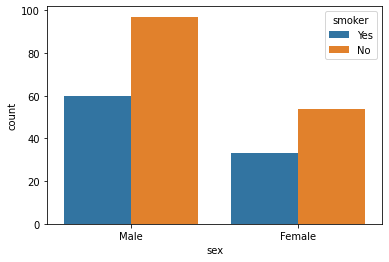

In [105]:
sns.countplot(x = "sex", data = df, hue = "smoker")

In [29]:
df_12=df[df["smoker"] == "Yes"]

In [30]:
s=(len(df_12[df_12["sex"] =="Female"])/len(df_12["sex"]))*100
s

35.483870967741936

    Female gender has the most smoking habit 

### 13.  Which day has lowest sale value?

In [102]:
sunday=df[df["day"] == "Sun"]["total_bill"].min()
friday=df[df["day"] == "Fri"]["total_bill"].min()
saturday=df[df["day"] == "Sat"]["total_bill"].min()
thursday=df[df["day"] == "Thur"]["total_bill"].min()
print("the sale on Sunday",sunday)
print("the sale on Friday",friday)
print("the sale on Saturday",saturday)
print("the sale on Thursday",thursday)


the sale on Sunday 7.25
the sale on Friday 5.75
the sale on Saturday 3.07
the sale on Thursday 7.51


    Saturday is the lowest sale value


### 14.  What are the infrequent total bill values in the dataset?

<AxesSubplot:ylabel='total_bill'>

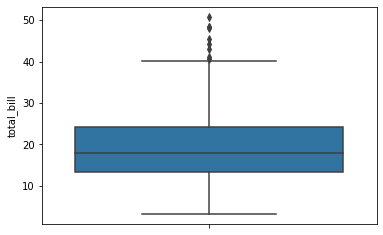

In [103]:
sns.boxplot(y=df["total_bill"])   


In [104]:
df["total_bill"].unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

### 15.  With respect to dinner time with table size 3,whho has made highest total bill value when they are smoker?


In [31]:
df[df["time"] == "Dinner"][df["smoker"] == "Yes"][df["size"] == 3][df["total_bill"] == df["total_bill"].max()]["sex"]

C:\Users\SRAM2\AppData\Local\Temp/ipykernel_4216/3536297547.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["time"] == "Dinner"][df["smoker"] == "Yes"][df["size"] == 3][df["total_bill"] == df["total_bill"].max()]["sex"]


170    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']



From the above result w r t dinner time with table size 3 male has made highest bill when they are smoker

### 16. What is meant by Spurious data anlysis?

    Spurious correlation, or spuriousness, occurs when two factors appear casually related to one another but are not.
    Statisticians and scientists use careful statistical analysis to determine spurious relationships.
       Confirming a causal relationship requires a study that controls for all possible variables.

### 17.  Why  Corerelation doesn't  imply causation? Give two examples on this. 

In [ ]:
Corerelation tels the relationship b/w two variables.   
causation tells the, how one variable effects the other
Eg.1: Wind speed and windmil speed
Eg.2: Mountain height and temperature    

### 18.  When compared to saturday's and sunday's which day  has highest sale? and show both days distribution in single histogram

In [35]:
import matplotlib.pyplot as plt




In [36]:
df_sun=df[df["day"]=="Sun"]["total_bill"]   

df_sat=df[df["day"]=="Sat"]["total_bill"]   

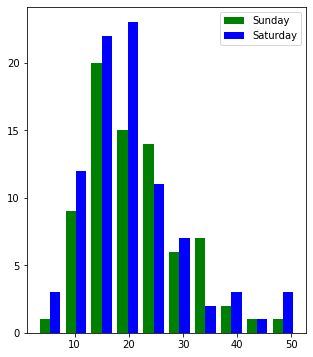

In [37]:
fig=plt.figure(figsize=(5,6))
axes1=fig.add_subplot(1,1,1)
axes1.hist([df_sun,df_sat],color=["green","blue"], label=["Sunday","Saturday"])
axes1.legend()

    In the above code when compared to sunday and saturday . saturday is the highest sale

### 19. Do u think when table size is increased we receive higher tiotal bills and tip values?

In [38]:
df.groupby("size")["total_bill","tip"].mean()

C:\Users\SRAM2\AppData\Local\Temp/ipykernel_4216/1460362144.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("size")["total_bill","tip"].mean()


,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


    Yes when table size is increased we receive higher totalbills and tip values 

### 20. Who loves smoking mostly and does that affect tip values when compared to non-smoking customers?

In [39]:
df.groupby(["smoker"])["tip"].mean() 

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip'>

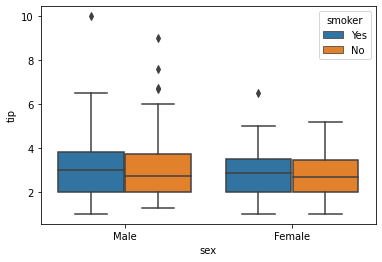

In [40]:
sns.boxplot(y=df["tip"],x=df["sex"],hue=df["smoker"])

###  21.  During saturday's and sunday's which gender has received highest average value with respect to lunch and dinner?


In [41]:
df[df["day"] == "sat"][["sex","time"]].value_counts()

Series([], dtype: int64)

In [42]:
df[df["day"] == "sun"][["sex","time"]].value_counts()   

Series([], dtype: int64)

In [43]:
df.groupby("day")["total_bill","tip"].describe()

C:\Users\SRAM2\AppData\Local\Temp/ipykernel_4216/1945022267.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("day")["total_bill","tip"].describe()


total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip                                                          
     count      mean       std   min     25%    50%     75%    max  
day                                                                 
Thur  62.0  2.771452  1.240223  1.25  2.0000  2.305  3.3625   6.70  
Fri   19.0  2.734737  1.019577  1.00  1.9600  3.000  3.3650   4.73  
Sat   87.0  2.993103  1.631014  1.00  2.0000  2.750  3.3700  10.00  
Sun   76.0  3.255132  1.234880  1.01  2.0375  3.150  4.0000   6.50

###  24.  Find the gender for max tip with minimum total bill value and min tip with max total bill  value

In [44]:
df.groupby(["sex","smoker"])["tip"].mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

      Female gender for max tip with min total bill and min tip with max total bill is 2 and male gender has 3

### 25.  Why do u feel sunday's total bill distribution is slightly higher than other days ? show plot and discuss

In [ ]:
sunday_1=df[df["day"]=="sun"]["total_bill"]
saturday_1=df[df["day"]=="sun"]["total_bill"]
thursday_1=df[df["day"]=="sun"]["total_bill"]
friday_1=df[df["day"]=="sun"]["total_bill"]




### 29.  Show the totalbill averages of different days in the data? and plot the same data

In [45]:
df.groupby("day")["total_bill"].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

    In the above code we shown the totalbill averages

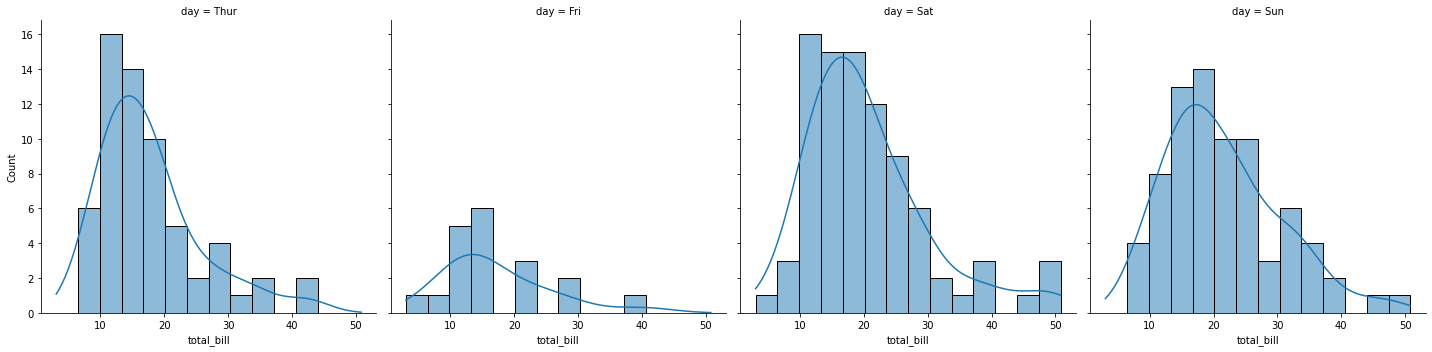

In [46]:
sns.displot(data=df, x="total_bill", col="day", kde=True)


### 30. what is meant by broadcasting the data?

    Broadcasting is simply a set of rules for applying binary functions(eg. addition, substraction, multiplication, etc.)
    on arrays of different sizes

### 31.  What is meant by scalar operation? and show a example.

In [47]:
df["total_bill"]/10   

0      1.699
1      1.034
2      2.101
3      2.368
4      2.459
       ...  
239    2.903
240    2.718
241    2.267
242    1.782
243    1.878
Name: total_bill, Length: 244, dtype: float64

### 32.  Group the data based on "sex" variable and find the ir averages and plot the same. 

In [48]:
df.groupby("sex")["total_bill","tip"].mean()

C:\Users\SRAM2\AppData\Local\Temp/ipykernel_4216/1636465842.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("sex")["total_bill","tip"].mean()


,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


### 33.  How do u deterine if two variables are highly or lowly corerelated?


       Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x,and y.
    A linear correlation coefficient that is greater than zero indicates a positive relationship.
    A value that is less than zero signifies a negative relationship.


### 34.  What table is chosen when total_bill value is exactly dollar 13.42 dollars and gender is female?

In [50]:
df_1=df[((df["total_bill"] == 13.42) & (df["sex"] == "Female"))]


In [51]:
df_1

,total_bill,tip,sex,smoker,day,time,size
121,13.42,1.68,Female,No,Thur,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2


    When totalbill value  is 13.42  dollar exactly and gender is female the table 2 is chosen

### 35. What is the mostly preferred time when table size is 5?

In [52]:
df[df["size"] == 5]["time"].value_counts()

Dinner    4
Lunch     1
Name: time, dtype: int64

In [53]:
df[df["size"] == 5]["time"].mode()

0    Dinner
Name: time, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

    Dinner is the mostly preferred time when table size is 5

### 36.  Which day is mostly preferred when table size is 4?

In [54]:
df[df["size"] == 4]["day"].value_counts()

Sun     18
Sat     13
Thur     5
Fri      1
Name: day, dtype: int64

In [55]:
df[df["size"] == 4]["day"].mode()

0    Sun
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

    Sunday is mostly preferred when table size is 4

### 37.   When it's saturday's, which  two table  sizes are  mostly preferred?

In [56]:
df[df["day"] == "Sat"]["size"].value_counts()

2    53
3    18
4    13
1     2
5     1
Name: size, dtype: int64

    In the above data when it's saturday 2 & 3 tables are mostly preferred

### 38. Which day is more preferred for lunch time>

In [57]:
df[df["time"] == "Lunch"]["day"].mode()


0    Thur
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

    Thursday is the more preferred for lunch time 

### 39. Which day is more preferred for lunch by female group?

In [58]:
df[df["sex"] == "Female"]["day"].value_counts()

Thur    32
Sat     28
Sun     18
Fri      9
Name: day, dtype: int64

    Thursday is the most preferred lunch by female group

### 40.  Please explain the significance role of  scatter plot?

       A scatter plot is a set of points plotted on a horizontal and vertical axes.
    Scatter plots are important in statistics because they can show the extent of correlation,
    if any, between the values of observed quantities or phenomena (called variables).
    If no correlation exists between the variables, the points appear randomly scattered on the coordinate plane.
    If a large correlation exists, the points concentrate near a straight line. 
       Scatter plots are useful data visualization tools for illustrating a trend.

### 41.  How much each value of total_bill is far from it's mean? 

In [63]:
df["total_bill"].mean()-df["total_bill"].unique()

array([ 2.79594262e+00,  9.44594262e+00, -1.22405738e+00, -3.89405738e+00,
       -4.80405738e+00, -5.50405738e+00,  1.10159426e+01, -7.09405738e+00,
        4.74594262e+00,  5.00594262e+00,  9.51594262e+00, -1.54740574e+01,
        4.36594262e+00,  1.35594262e+00,  4.95594262e+00, -1.79405738e+00,
        9.45594262e+00,  3.49594262e+00,  2.81594262e+00, -8.64057377e-01,
        1.86594262e+00, -5.04057377e-01,  4.01594262e+00, -1.96340574e+01,
       -3.40573770e-02,  1.97594262e+00,  6.41594262e+00,  7.09594262e+00,
       -1.91405738e+00,  1.35942623e-01,  1.02359426e+01,  1.43594262e+00,
        4.72594262e+00, -9.04057377e-01,  2.00594262e+00, -4.27405738e+00,
        3.47594262e+00,  2.85594262e+00,  1.09594262e+00, -1.14840574e+01,
        3.74594262e+00,  2.32594262e+00,  5.84594262e+00,  1.01059426e+01,
       -1.06140574e+01,  1.49594262e+00, -2.44405738e+00, -1.26140574e+01,
       -8.76405738e+00,  1.74594262e+00,  7.24594262e+00,  9.49594262e+00,
       -1.50240574e+01,  

### 42. Can u take random sample of 50 observations without changing it's state from this data?

In [64]:
df.sample(50,random_state = 24)

,total_bill,tip,sex,smoker,day,time,size
103,22.42,3.48,Female,Yes,Sat,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
144,16.43,2.30,Female,No,Thur,Lunch,2
68,20.23,2.01,Male,No,Sat,Dinner,2
112,38.07,4.00,Male,No,Sun,Dinner,3
151,13.13,2.00,Male,No,Sun,Dinner,2
108,18.24,3.76,Male,No,Sat,Dinner,2
127,14.52,2.00,Female,No,Thur,Lunch,2
25,17.81,2.34,Male,No,Sat,Dinner,4
77,27.20,4.00,Male,No,Thur,Lunch,4


### 43. Random pick 10 observations of total_bill with certain random state and return its highest total_bill value Repeat the process for 10 times and find it's average value

In [65]:
x = df["total_bill"].sample(10)
max(x)
for i in x:
    print(i)
sum(x)/len(x)

10.33
16.45
11.69
48.27
16.4
44.3
18.64
20.27
11.61
19.81


21.776999999999997

### 45. Identify the data where total_bill and tip values are having atleast 10 dollars difference

In [66]:
df["total_amount"]=df["total_bill"]-df["tip"]
print(df[df["total_amount"] == 10])

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size, total_amount]
Index: []


### 46. Why friday is most typical day for better transactions? please in detail

In [67]:
len(df[df["day"] == "Fri"])

19

In [68]:
len(df[df["day"] == "Sat"])

87

In [69]:
len(df[df["day"] == "Sun"])

76

In [70]:
len(df[df["day"] == "Thur"])

62

       When compared to three days friday is the 

### 47.  Randomly pick a total bill value from 0-10dlr,11-20dlr,21-30dlr,31-40dlr and 41-50dlr and return the highest among the list .And repeat the process for atleast 5 times and identify which are closest values.

In [73]:
a=df[(df["total_bill"]>=0) & (df["total_bill"]<=10)]
len(a)

17

In [74]:
b=df[(df["total_bill"]>=11) & (df["total_bill"]<=20)]
len(b)

116

In [75]:
c=df[(df["total_bill"]>=21) & (df["total_bill"]<=30)]
len(c)

51

In [76]:
d=df[(df["total_bill"]>=31) & (df["total_bill"]<=40)]
len(d)

18

In [87]:
e=df[(df["total_bill"]>=41) & (df["total_bill"]<=50)]
len(e)

7

    Randomly pick total bill from 0 to 50 dlr  repeat the process atleast  5 times 41-50 dlr are closest values

### 49. Discuss  your  ideology and critics of why female has less smoking data compared to male?

In [77]:
x=df[df["smoker"] == "Yes"]
len(x[x["sex"] == "Female"])

33

In [78]:
x=df[df["smoker"] == "No"]
len(x[x["sex"] == "Male"])

97

    In the above code when compared to male and female , female has less smoking data compared to male baecuse mostly male has habit to the smoking

### 50.  Randomly pick a record from this dataset and return it's gender with total bill and tip  values. Repeat the process for atleast for 5 times and retuen highest among them.

In [82]:
a=df[["sex","total_bill"]]
a.loc[0]

sex           Female
total_bill     16.99
Name: 0, dtype: object

In [83]:
b=df[["sex","total_bill"]]
b.loc[1]

sex            Male
total_bill    10.34
Name: 1, dtype: object

In [84]:
c=df[["sex","total_bill"]]
c.loc[2]

sex            Male
total_bill    21.01
Name: 2, dtype: object

In [85]:
d=df[["sex","total_bill"]]
d.loc[3]

sex            Male
total_bill    23.68
Name: 3, dtype: object

In [86]:
e=df[["sex","total_bill"]]
e.loc[4]

sex           Female
total_bill     24.59
Name: 4, dtype: object

    Randomly pick a record from this dataset repeat the process atleast 5 times return highest value is gender female and total_bill is 24.59